<a href="https://colab.research.google.com/github/btrosso/TensorFlow_Learning/blob/main/01_neural_network_regression_in_tensorflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction to Regression with Neural Networks in Tensorflow

There are many definitions for a regression problem but in our case, we're going to simplify it: predicting a numerical variable based on some other combination of variable, even shorter....predicting a number.

In [1]:
# Import TensorFlow
import tensorflow as tf
print(tf.__version__)

2.14.0


# Creating some data to view and fit

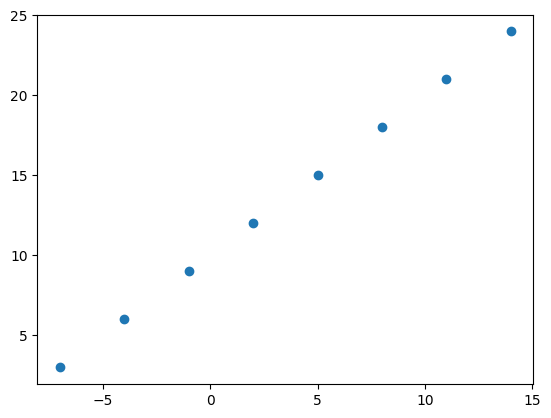

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Create features (inputs)
X = np.array([-7.0, -4.0, -1.0, 2.0, 5.0, 8.0, 11.0, 14.0])

# Create labels
y = np.array([3.0, 6.0, 9.0, 12.0, 15.0, 18.0, 21.0, 24.0])

# Visualize it
plt.scatter(X, y)

In [3]:
y == X + 10

array([ True,  True,  True,  True,  True,  True,  True,  True])

## Input and Output Shapes

In [4]:
# Create a demo tensor for our housing price prediction problem
house_info = tf.constant(["bedroom", "bathroom", "garage"])
house_price = tf.constant([939700])
house_info, house_price

(<tf.Tensor: shape=(3,), dtype=string, numpy=array([b'bedroom', b'bathroom', b'garage'], dtype=object)>,
 <tf.Tensor: shape=(1,), dtype=int32, numpy=array([939700], dtype=int32)>)

In [5]:
X[0], y[0]

(-7.0, 3.0)

In [6]:
X[1], y[1]

(-4.0, 6.0)

In [7]:
input_shape = X[0].shape
output_shape = y[0].shape
input_shape, output_shape

((), ())

In [8]:
X[0].ndim

0

In [9]:
X[0], y[0]

(-7.0, 3.0)

In [10]:
# Turn our numpy arrays into tensors
X = tf.cast(tf.constant(X), dtype=tf.float32)
y = tf.cast(tf.constant(y), dtype=tf.float32)
X, y


(<tf.Tensor: shape=(8,), dtype=float32, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.], dtype=float32)>,
 <tf.Tensor: shape=(8,), dtype=float32, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.], dtype=float32)>)

In [11]:
input_shape = X[0].shape
output_shape = y[0].shape
input_shape, output_shape

(TensorShape([]), TensorShape([]))

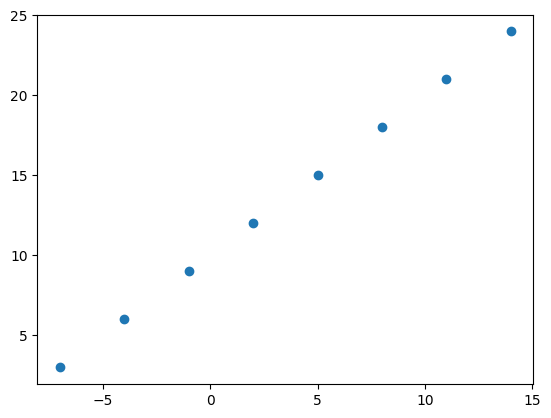

In [12]:
plt.scatter(X, y)

## Steps in modelling with TensorFlow

1. **Creating a model** - define the input and the output layers, as well as the hidden layers of deep learning model.
2. **Compiling a model** - define the loss function (in other words, the function which tells our model how wrong it is) and the optimizer (tells our model how to improve the pattern its learning) and evaluation metrics (what we can use to interpret the performance of our model).
3. Fitting a model - letting the model try to find patterns between X & y (features and labels)

In [13]:
# Set random seed
tf.random.set_seed(42)

# 1. Create a model using the Sequential API
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
model.compile(
    loss=tf.keras.losses.mae,  # mae is short for mean absolute error
    optimizer=tf.keras.optimizers.SGD(),  # SGD stands for stochastic gradient decent
    metrics=["mae"]
    )

# 3. Fit the model
model.fit(tf.expand_dims(X, axis=-1), y, epochs=5)

Epoch 1/5
1/1 [==============================] - 1s 1s/step - loss: 10.1426 - mae: 10.1426
Epoch 2/5
1/1 [==============================] - 0s 12ms/step - loss: 10.0101 - mae: 10.0101
Epoch 3/5
1/1 [==============================] - 0s 16ms/step - loss: 9.8776 - mae: 9.8776
Epoch 4/5
1/1 [==============================] - 0s 22ms/step - loss: 9.7451 - mae: 9.7451
Epoch 5/5
1/1 [==============================] - 0s 20ms/step - loss: 9.6126 - mae: 9.6126


In [14]:
# Check out X and y
X, y

(<tf.Tensor: shape=(8,), dtype=float32, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.], dtype=float32)>,
 <tf.Tensor: shape=(8,), dtype=float32, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.], dtype=float32)>)

In [15]:
# Try and make a prediction using our model
y_pred = model.predict([17.0])
y_pred

1/1 [==============================] - 0s 209ms/step


array([[19.33215]], dtype=float32)

In [16]:
y_pred + 14

array([[33.33215]], dtype=float32)

## Improving Our Model

We can improve our model by altering the steps we used to create a model

1.  **Creating a model** - here we might add more layers, increase the number of hidden units (all called neurons) within each of the hidden layers, change the activation function of each layer.
2. **Compiling a model** - here we might change the optimization function or perhaps the **learning rate** of the optimization function.
3. **Fitting the model** - here we might fit a model for more **epochs** (leave it training for longer) or on more data (give the modelmore examples to learn from)

In [17]:
# 1st HYPERPARAMETER TWEAK --> EPOCHS

# 1. Create the model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
model.compile(
    loss=tf.keras.losses.mae,  # mae stands for mean absolute error
    optimizer=tf.keras.optimizers.SGD(),  # SGD stands for stochastic gradient decent
    metrics=["mae"]
)

# Fit the model
model.fit(tf.expand_dims(X, axis=-1), y, epochs=100)

Epoch 1/100
1/1 [==============================] - 1s 748ms/step - loss: 15.3618 - mae: 15.3618
Epoch 2/100
1/1 [==============================] - 0s 14ms/step - loss: 15.0806 - mae: 15.0806
Epoch 3/100
1/1 [==============================] - 0s 16ms/step - loss: 14.8587 - mae: 14.8587
Epoch 4/100
1/1 [==============================] - 0s 11ms/step - loss: 14.7262 - mae: 14.7262
Epoch 5/100
1/1 [==============================] - 0s 12ms/step - loss: 14.5937 - mae: 14.5937
Epoch 6/100
1/1 [==============================] - 0s 11ms/step - loss: 14.4612 - mae: 14.4612
Epoch 7/100
1/1 [==============================] - 0s 17ms/step - loss: 14.3287 - mae: 14.3287
Epoch 8/100
1/1 [==============================] - 0s 17ms/step - loss: 14.1962 - mae: 14.1962
Epoch 9/100
1/1 [==============================] - 0s 18ms/step - loss: 14.0637 - mae: 14.0637
Epoch 10/100
1/1 [==============================] - 0s 28ms/step - loss: 13.9312 - mae: 13.9312
Epoch 11/100
1/1 [==============================

In [18]:
# Remind ourselves of the data
X, y

(<tf.Tensor: shape=(8,), dtype=float32, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.], dtype=float32)>,
 <tf.Tensor: shape=(8,), dtype=float32, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.], dtype=float32)>)

In [19]:
# Let's see if our models prediction has improved
model.predict([17.0])

1/1 [==============================] - 0s 254ms/step


array([[29.330166]], dtype=float32)

In [20]:
# 2nd HYPERPARAMETER TWEAK --> OPTIMIZER

# 1. Create the model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
model.compile(
    loss=tf.keras.losses.mae,
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
    metrics=["mae"]
)

# 3. Fit the model
model.fit(tf.expand_dims(X, axis=-1), y, epochs=100)

Epoch 1/100
1/1 [==============================] - 2s 2s/step - loss: 16.9075 - mae: 16.9075
Epoch 2/100
1/1 [==============================] - 0s 21ms/step - loss: 16.9069 - mae: 16.9069
Epoch 3/100
1/1 [==============================] - 0s 25ms/step - loss: 16.9063 - mae: 16.9063
Epoch 4/100
1/1 [==============================] - 0s 53ms/step - loss: 16.9057 - mae: 16.9057
Epoch 5/100
1/1 [==============================] - 0s 16ms/step - loss: 16.9051 - mae: 16.9051
Epoch 6/100
1/1 [==============================] - 0s 31ms/step - loss: 16.9045 - mae: 16.9045
Epoch 7/100
1/1 [==============================] - 0s 29ms/step - loss: 16.9039 - mae: 16.9039
Epoch 8/100
1/1 [==============================] - 0s 36ms/step - loss: 16.9033 - mae: 16.9033
Epoch 9/100
1/1 [==============================] - 0s 29ms/step - loss: 16.9027 - mae: 16.9027
Epoch 10/100
1/1 [==============================] - 0s 34ms/step - loss: 16.9021 - mae: 16.9021
Epoch 11/100
1/1 [==============================] -

In [21]:
model.predict([17.0])

1/1 [==============================] - 0s 133ms/step


array([[-13.282199]], dtype=float32)

In [22]:
# FINAL TWEAKS

# 1. Create the model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(50, activation=None),
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
model.compile(
    loss=tf.keras.losses.mae,
    optimizer=tf.keras.optimizers.Adam(lr=0.01),
    metrics=["mae"]
)

# 3. Fit the model
model.fit(tf.expand_dims(X, axis=-1), y, epochs=100)

Epoch 1/100
1/1 [==============================] - 1s 1s/step - loss: 13.9493 - mae: 13.9493
Epoch 2/100
1/1 [==============================] - 0s 30ms/step - loss: 13.8816 - mae: 13.8816
Epoch 3/100
1/1 [==============================] - 0s 14ms/step - loss: 13.8140 - mae: 13.8140
Epoch 4/100
1/1 [==============================] - 0s 33ms/step - loss: 13.7463 - mae: 13.7463
Epoch 5/100
1/1 [==============================] - 0s 24ms/step - loss: 13.6786 - mae: 13.6786
Epoch 6/100
1/1 [==============================] - 0s 12ms/step - loss: 13.6109 - mae: 13.6109
Epoch 7/100
1/1 [==============================] - 0s 9ms/step - loss: 13.5432 - mae: 13.5432
Epoch 8/100
1/1 [==============================] - 0s 24ms/step - loss: 13.4754 - mae: 13.4754
Epoch 9/100
1/1 [==============================] - 0s 15ms/step - loss: 13.4076 - mae: 13.4076
Epoch 10/100
1/1 [==============================] - 0s 10ms/step - loss: 13.3398 - mae: 13.3398
Epoch 11/100
1/1 [==============================] - 

In [23]:
model.predict([17.0])

1/1 [==============================] - 0s 126ms/step


array([[30.238663]], dtype=float32)

## Common Ways to Improve A Deep Model:



*   Adding layers
*   Increase the number of hidden units
*   Change the activation functions
*   Change the optimization function
*   Change the learning rate (potentially the most important hyperparameter of many different neural networks)
*   Fitting on more data
*   Fitting for longer



## Evaluating a Model

In practice, a typical workflow you'll go through when building neural networks is:
```
Build a model -> fit it -> evaluate it -> tweak a model -> fit it -> evaluate it -> tweak a model -> fit it -> evaluate it...
```

When it comes to evaluation... there are 3 words you should memorize:
> "Visualize, visualize, visualize."

it's a good idea to visualize:
* The data - what data are we working with? What does it look like?
* The model itself - what does our model look like?
* The training of a model - how does the model perform while it learns?
* The predictions of the model - how do the predictions of the model line up with the ground truth (the original labels)?

In [24]:
# Make a bigger dataset
X = tf.range(-100, 100, 4)
X

<tf.Tensor: shape=(50,), dtype=int32, numpy=
array([-100,  -96,  -92,  -88,  -84,  -80,  -76,  -72,  -68,  -64,  -60,
        -56,  -52,  -48,  -44,  -40,  -36,  -32,  -28,  -24,  -20,  -16,
        -12,   -8,   -4,    0,    4,    8,   12,   16,   20,   24,   28,
         32,   36,   40,   44,   48,   52,   56,   60,   64,   68,   72,
         76,   80,   84,   88,   92,   96], dtype=int32)>

In [25]:
# Make labels for the dataset
y = X + 10
y

<tf.Tensor: shape=(50,), dtype=int32, numpy=
array([-90, -86, -82, -78, -74, -70, -66, -62, -58, -54, -50, -46, -42,
       -38, -34, -30, -26, -22, -18, -14, -10,  -6,  -2,   2,   6,  10,
        14,  18,  22,  26,  30,  34,  38,  42,  46,  50,  54,  58,  62,
        66,  70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>

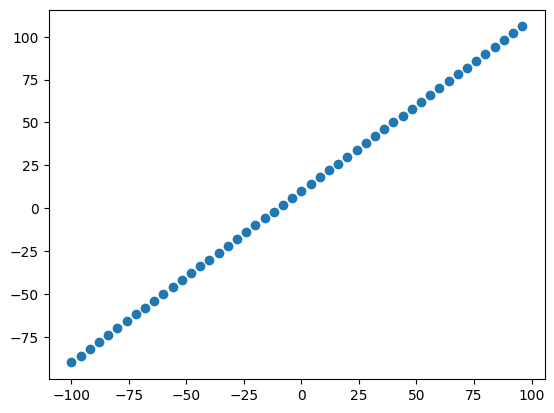

In [26]:
# Visualize the data
import matplotlib.pyplot as plt

plt.scatter(X, y)

### The 3 sets...

* ***Training set*** - the model learns from this data, which is typically 70-80% if the total data you have available.
* ***Validation set*** - the model gets tuned on this data, which is typically 10-15% of the data available.
* ***Test set*** - the model gets evaluated on this data to test what it has learned, this set is typically 10-15% if the total available data.

In [27]:
# Check the length of how many samples we have
len(X)

50

In [28]:
# Split the data into train and test sets
X_train = X[:40]  # First 40 are training samples (80%)
y_train = y[:40]

X_test = X[40:]  # Last 10 are the test samples (20%)
y_test = y[40:]

len(X_train), len(X_test), len(y_train), len(y_test)

(40, 10, 40, 10)

### Visualizing the data

Now we've got our data in training and test sets...let's visualize it again!

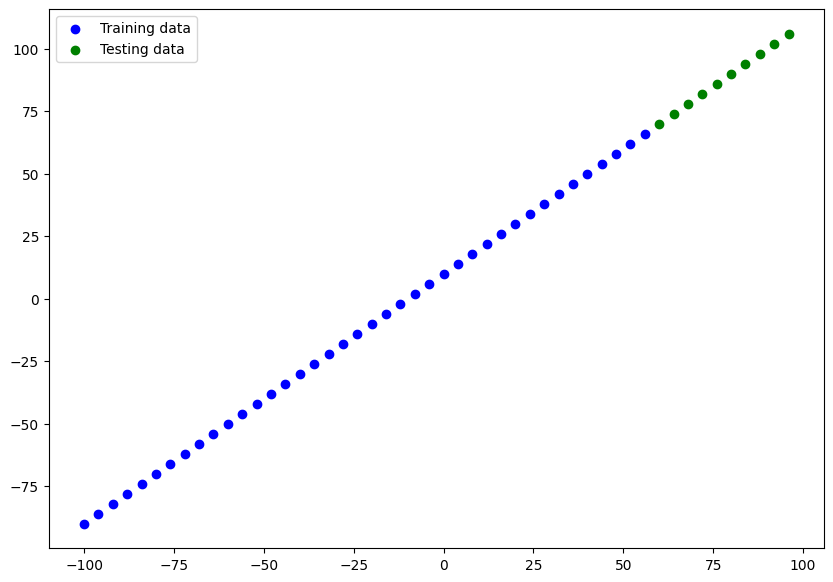

In [29]:
plt.figure(figsize=(10, 7))
# Plot training data in blue
plt.scatter(X_train, y_train, c="b", label="Training data") # our model will learn on this
# Plot test data in green
plt.scatter(X_test, y_test, c="g", label="Testing data") # want our model to be able to predict this (given X, what's y?)
# Show a legend
plt.legend();

In [30]:
# Let's have a look at how to build a neural network for our data

# 1. Create a model
model = tf.keras.Sequential([
  tf.keras.layers.Dense(1)
])

# 2. Compile the model
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(),
              metrics=["mae"])

# # 3. Fit the model
# model.fit(X_train, y_train, epochs=100)

### Visualizing the model

In [31]:
# model.summary()

In [32]:
X[0], y[0]

(<tf.Tensor: shape=(), dtype=int32, numpy=-100>,
 <tf.Tensor: shape=(), dtype=int32, numpy=-90>)

In [33]:
# Let's create a model which builds automatically by defining the input_shape argument in the first layer
tf.random.set_seed(42)

# 1. Create a model (same as above)
model = tf.keras.Sequential([
  tf.keras.layers.Dense(10, input_shape=[1], name="input_layer"),
  tf.keras.layers.Dense(1, name="output_layer")
], name="model_1")

# 2. Compile the model (same as above)
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(),
              metrics=["mae"])

In [34]:
model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (Dense)         (None, 10)                20        
                                                                 
 output_layer (Dense)        (None, 1)                 11        
                                                                 
Total params: 31 (124.00 Byte)
Trainable params: 31 (124.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


* Total params - total number of parameters in the model.
* Trainable parameters - these are the parameters (patterns) the model can update as it trains.
* Non-trainable params - these parameters aren't updated during training (this is typical when you bring in already learn patterns or parameters from other models during **transfer learning**).

📖 **Resource:** For a more in-depth overview of the trainable parameters within a layer, check out [MIT's introduction to deep learning video](https://youtu.be/njKP3FqW3Sk).

🛠 **Exercise:** Try playing around with the number of hidden units in the dense layer, see how that effects the number of parameters (total and trainable) by calling `model.summary()`.

In [35]:
# Let's fit our model to the training data
model.fit(X_train, y_train, epochs=100, verbose=0)

In [36]:
# Get a summary of our model
model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (Dense)         (None, 10)                20        
                                                                 
 output_layer (Dense)        (None, 1)                 11        
                                                                 
Total params: 31 (124.00 Byte)
Trainable params: 31 (124.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


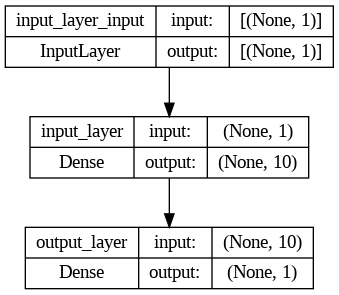

In [37]:
from tensorflow.keras.utils import plot_model

plot_model(model=model, show_shapes=True)

### Visualizing our model's predictions

To visualize predictions, it's a good idea to plot them against the ground truth labels.

Often you'll see this in the form of `y_test` or `y_true` versus `y_pred` (ground truth versus your model's predictions).

In [38]:
# Make some predictions
y_pred = model.predict(X_test)
y_pred

1/1 [==============================] - 0s 429ms/step


array([[ 70.44095 ],
       [ 75.021965],
       [ 79.603   ],
       [ 84.18402 ],
       [ 88.76504 ],
       [ 93.34608 ],
       [ 97.9271  ],
       [102.50811 ],
       [107.089134],
       [111.67016 ]], dtype=float32)

In [39]:
y_test

<tf.Tensor: shape=(10,), dtype=int32, numpy=array([ 70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>

In [40]:
# Let's create a plotting function
def plot_predictions(train_data=X_train,
                     train_labels=y_train,
                     test_data=X_test,
                     test_labels=y_test,
                     predictions=y_pred):
  """
  Plots training data, test data and compares predictions to ground truth labels.
  """
  plt.figure(figsize=(10, 7))
  # Plot training data in blue
  plt.scatter(train_data, train_labels, c="b", label="Training data")
  # Plot testing data in green
  plt.scatter(test_data, test_labels, c="g", label="Testing data")
  # Plot model's predictions in red
  plt.scatter(test_data, predictions, c="r", label="Predictions")
  # Show the legend
  plt.legend();

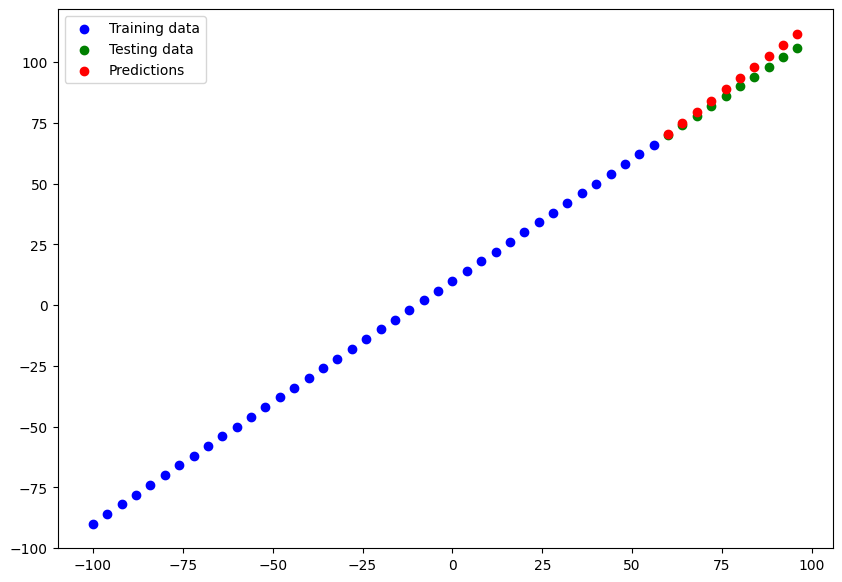

In [41]:
plot_predictions(train_data=X_train,
                 train_labels=y_train,
                 test_data=X_test,
                 test_labels=y_test,
                 predictions=y_pred)

### Evaluting our model's predictions with regression evaluation metrics

Depending on the problem you're working on, there will be different evaluation metrics to evaluate your model's performance.

Since we're working on a regression, two of the main metrics:
* MAE - mean absolute error, "on average, how wrong is each of my model's predictions"
* MSE - mean square error, "square the average errors"

In [42]:
# Evaluate the model on the test
model.evaluate(X_test, y_test)

1/1 [==============================] - 0s 208ms/step - loss: 3.0556 - mae: 3.0556


[3.055554151535034, 3.055554151535034]

In [43]:
# Calculate the mean absolute error
mae = tf.metrics.mean_absolute_error(y_true=y_test,
                                     y_pred=tf.constant(y_pred))
mae

<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([17.647242, 14.186821, 11.758801, 10.363195, 10.      , 10.669215,
       12.37084 , 15.206488, 19.089134, 23.670158], dtype=float32)>

In [44]:
tf.constant(y_pred)

<tf.Tensor: shape=(10, 1), dtype=float32, numpy=
array([[ 70.44095 ],
       [ 75.021965],
       [ 79.603   ],
       [ 84.18402 ],
       [ 88.76504 ],
       [ 93.34608 ],
       [ 97.9271  ],
       [102.50811 ],
       [107.089134],
       [111.67016 ]], dtype=float32)>

In [45]:
y_test

<tf.Tensor: shape=(10,), dtype=int32, numpy=array([ 70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>

In [46]:
tf.squeeze(y_pred)

<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([ 70.44095 ,  75.021965,  79.603   ,  84.18402 ,  88.76504 ,
        93.34608 ,  97.9271  , 102.50811 , 107.089134, 111.67016 ],
      dtype=float32)>

In [47]:
# Calculate the mean absolute error
mae = tf.metrics.mean_absolute_error(y_true=y_test,
                                     y_pred=tf.squeeze(y_pred))
mae

<tf.Tensor: shape=(), dtype=float32, numpy=3.0555549>

In [48]:
# Calculate the mean square error
mse = tf.metrics.mean_squared_error(
    y_true=y_test,
    y_pred=tf.squeeze(y_pred)
)
mse

<tf.Tensor: shape=(), dtype=float32, numpy=12.121522>

In [49]:
# Make some functions to reuse MAE and MSE
def mae(y_true, y_pred):
  return tf.metrics.mean_absolute_error(y_true=y_true, y_pred=tf.squeeze(y_pred))

def mse(y_true, y_pred):
  return tf.metrics.mean_squared_error(y_true=y_true, y_pred=tf.squeeze(y_pred))

### Running Experiments to improve our model

```
Build a model -> fit it -> evaluate it -> tweak it -> fit it -> evaluate it -> tweak it....
```
1. Get more data - get more examples for your model to train on (more opportunities to learn patterns or relationships between features and labels)
2. Make your model larger (using a more complex model) - this might come in the form of more layers or more hidden units in each layer.
3. Train for longer - give your model more of a chance to find patterns in the data


Let's do 3 modeling experiments:
1. `model_1` - same as original model, 1 layer trained for 100 epochs
2. `model_2` - 2 layers, trained for 100 epochs
3. `model_3` - 2 layers, trained for 500 epochs

** Build `model_1`**

In [50]:
# Set random see (for reproducibility)
tf.random.set_seed(42)

# 1. Create the model
model_1 = tf.keras.Sequential([
    tf.keras.layers.Dense(1, input_shape=[1])
])

# 2. Compile the model
model_1.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.SGD(),
                metrics=["mae"])

# 3. Fit the model
model_1.fit(X_train, y_train, epochs=100)

Epoch 1/100
2/2 [==============================] - 0s 10ms/step - loss: 57.9667 - mae: 57.9667
Epoch 2/100
2/2 [==============================] - 0s 6ms/step - loss: 23.4725 - mae: 23.4725
Epoch 3/100
2/2 [==============================] - 0s 6ms/step - loss: 10.4576 - mae: 10.4576
Epoch 4/100
2/2 [==============================] - 0s 10ms/step - loss: 12.9281 - mae: 12.9281
Epoch 5/100
2/2 [==============================] - 0s 10ms/step - loss: 11.9687 - mae: 11.9687
Epoch 6/100
2/2 [==============================] - 0s 11ms/step - loss: 11.1133 - mae: 11.1133
Epoch 7/100
2/2 [==============================] - 0s 10ms/step - loss: 13.8489 - mae: 13.8489
Epoch 8/100
2/2 [==============================] - 0s 11ms/step - loss: 8.4922 - mae: 8.4922
Epoch 9/100
2/2 [==============================] - 0s 11ms/step - loss: 17.7738 - mae: 17.7738
Epoch 10/100
2/2 [==============================] - 0s 11ms/step - loss: 12.1711 - mae: 12.1711
Epoch 11/100
2/2 [==============================] - 0

1/1 [==============================] - 0s 106ms/step


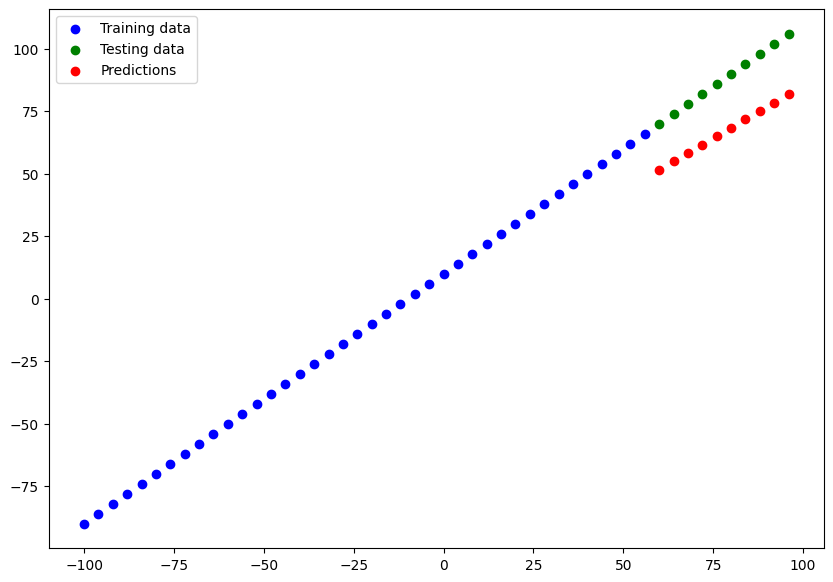

In [51]:
# Make and plot predictions with model_1
y_preds_1 = model_1.predict(X_test)
plot_predictions(predictions=y_preds_1)

In [52]:
# Calculate model_1 evaluation metrics
mae_1 = mae(y_test, y_preds_1)
mse_1 = mse(y_test, y_preds_1)
mae_1, mse_1

(<tf.Tensor: shape=(), dtype=float32, numpy=21.285198>,
 <tf.Tensor: shape=(), dtype=float32, numpy=456.496>)

**Build `model_2`**
* 2 Dense layers, trained for 100 epochs


In [53]:
# Set random see (for reproducibility)
tf.random.set_seed(42)

# 1. Create the model
model_2 = tf.keras.Sequential([
    tf.keras.layers.Dense(10, input_shape=[1]),
    tf.keras.layers.Dense(1),
])

# 2. Compile the model
model_2.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.SGD(),
                metrics=["mse"])

# 3. Fit the model
model_2.fit(X_train, y_train, epochs=100)

Epoch 1/100
2/2 [==============================] - 1s 18ms/step - loss: 29.6963 - mse: 1342.1251
Epoch 2/100
2/2 [==============================] - 0s 13ms/step - loss: 25.8412 - mse: 878.0207
Epoch 3/100
2/2 [==============================] - 0s 12ms/step - loss: 29.9412 - mse: 1364.0898
Epoch 4/100
2/2 [==============================] - 0s 15ms/step - loss: 13.9512 - mse: 261.6295
Epoch 5/100
2/2 [==============================] - 0s 12ms/step - loss: 19.0694 - mse: 494.4940
Epoch 6/100
2/2 [==============================] - 0s 12ms/step - loss: 9.5356 - mse: 123.0222
Epoch 7/100
2/2 [==============================] - 0s 20ms/step - loss: 10.5218 - mse: 141.1228
Epoch 8/100
2/2 [==============================] - 0s 12ms/step - loss: 12.8476 - mse: 224.4710
Epoch 9/100
2/2 [==============================] - 0s 12ms/step - loss: 33.7274 - mse: 1700.1609
Epoch 10/100
2/2 [==============================] - 0s 12ms/step - loss: 23.0618 - mse: 743.3862
Epoch 11/100
2/2 [===================

1/1 [==============================] - 0s 301ms/step


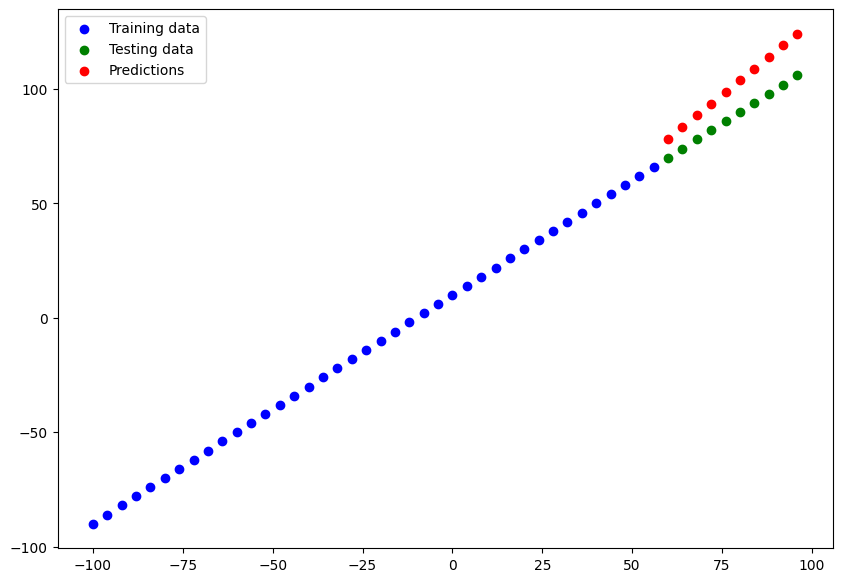

In [54]:
y_preds_2 = model_2.predict(X_test)
plot_predictions(predictions=y_preds_2)

In [55]:
# Calculate model_2 evaluation metrics
mae_2 = mae(y_test, y_preds_2)
mse_2 = mse(y_test, y_preds_2)
mae_2, mse_2

(<tf.Tensor: shape=(), dtype=float32, numpy=13.223755>,
 <tf.Tensor: shape=(), dtype=float32, numpy=184.88441>)

**Build `model_3`**
* 2 layers, trained for 500 epochs


In [56]:
# Set the random seed for reproducibility
tf.random.set_seed(42)

# 1. Create the model
model_3 = tf.keras.Sequential([
    tf.keras.layers.Dense(10, input_shape=[1]),
    tf.keras.layers.Dense(1)
])


# 2. Compile the model
model_3.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.SGD(),
                metrics=["mse"])

# 3. Fit the model
model_3.fit(X_train, y_train, epochs=500)


Epoch 1/500
2/2 [==============================] - 2s 18ms/step - loss: 14.9273 - mse: 317.5660
Epoch 2/500
2/2 [==============================] - 0s 17ms/step - loss: 24.6483 - mse: 946.9901
Epoch 3/500
2/2 [==============================] - 0s 12ms/step - loss: 19.6768 - mse: 566.7897
Epoch 4/500
2/2 [==============================] - 0s 11ms/step - loss: 14.2040 - mse: 264.7721
Epoch 5/500
2/2 [==============================] - 0s 11ms/step - loss: 15.8482 - mse: 328.7852
Epoch 6/500
2/2 [==============================] - 0s 13ms/step - loss: 12.5621 - mse: 205.4861
Epoch 7/500
2/2 [==============================] - 0s 14ms/step - loss: 11.8308 - mse: 173.7504
Epoch 8/500
2/2 [==============================] - 0s 19ms/step - loss: 12.9007 - mse: 227.1532
Epoch 9/500
2/2 [==============================] - 0s 21ms/step - loss: 33.9553 - mse: 1726.5510
Epoch 10/500
2/2 [==============================] - 0s 13ms/step - loss: 23.2558 - mse: 756.5182
Epoch 11/500
2/2 [====================

1/1 [==============================] - 0s 102ms/step


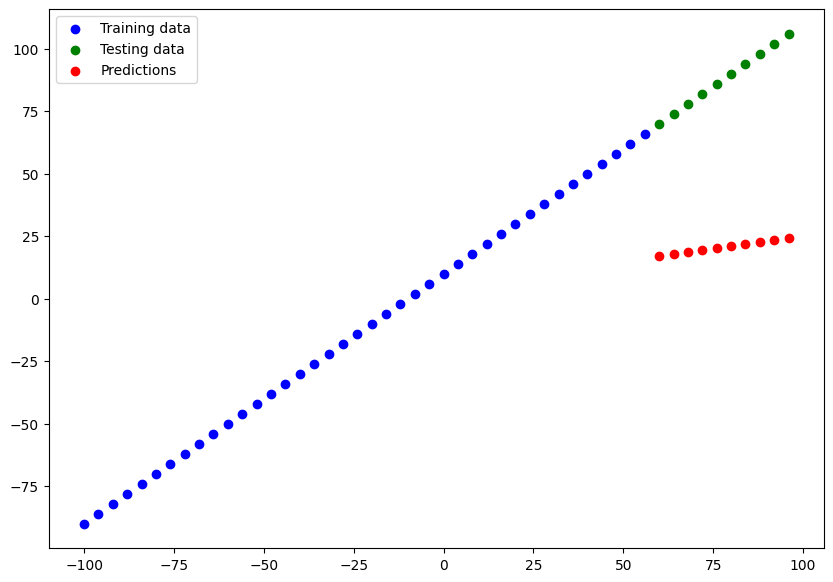

In [57]:
y_preds_3 = model_3.predict(X_test)
plot_predictions(predictions=y_preds_3)

In [58]:
# Calculate model_3 evaluation metrics
mae_3 = mae(y_test, y_preds_3)
mse_3 = mse(y_test, y_preds_3)
mae_3, mse_3

(<tf.Tensor: shape=(), dtype=float32, numpy=67.31282>,
 <tf.Tensor: shape=(), dtype=float32, numpy=4613.81>)

🔑**NOTE:** You want to start with small experiments (small models) and make sure they work, and then increase the scale when needed.

### Comparing the results of our experiments

We've run a few experiments, let's compare the results.


In [59]:
# Let's compare our models results using a pandas dataframe
import pandas as pd

model_results = [["model_1", mae_1.numpy(), mse_1.numpy()],
                 ["model_2", mae_2.numpy(), mse_2.numpy()],
                 ["model_3", mae_3.numpy(), mse_3.numpy()]]
all_results = pd.DataFrame(model_results, columns=["model", "mae", "mse"])
all_results

,model,mae,mse
0,model_1,21.285198,456.496002
1,model_2,13.223755,184.884415
2,model_3,67.312820,4613.810059


Looks like `model_2` performed the best...

In [60]:
model_2.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_7 (Dense)             (None, 10)                20        
                                                                 
 dense_8 (Dense)             (None, 1)                 11        
                                                                 
Total params: 31 (124.00 Byte)
Trainable params: 31 (124.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


> 🔑**NOTE:** One of your main goals should be to minimize the time between your experiments. The more experiments you do, the more things you'll figure out which don't work and in turn, get closer to figuring out what does work. Remember the machine learning practitioner's motto: "experiment, experiment, experiment".

## Tracking your experiments

One really good habit in machine learning modelling is to track the results of your experiments.

And when doing so, it can be tedious if you're running lots of experiments.

Luckily, there are tools to help us!

📖**Resource:** As you build more models, you'll want to look into using:
* TensorBoard - a component of the TensorFlow library to help track modelling experiments (we'll see this one later).
* Weights & Biases - a tool for tracking all kinds of machine learning experiments (plugs straight into TensorBoard).

## Saving our models

Saving our models allows us to use them outside of google colab or wherever they were trained, such as a web application or a mobile app.

There are 2 main formats we can save our model to:
1. The SaveModel format
2. The HDF5 format

In [61]:
# Save model using the SaveModel format
model_2.save("best_model_SavedModel_format")

In [62]:
# Save model in HDF5 format
model_2.save("best_model_HDF5_format.hdf5")

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


## Loading in a Saved Model


In [63]:
# Load in the SavedModel format model
loaded_SavedModel_format = tf.keras.models.load_model("/content/best_model_SavedModel_format")
loaded_SavedModel_format.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_7 (Dense)             (None, 10)                20        
                                                                 
 dense_8 (Dense)             (None, 1)                 11        
                                                                 
Total params: 31 (124.00 Byte)
Trainable params: 31 (124.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [64]:
# Compare model_2 predictions with SavedModel format predictions
model_2_preds = model_2.predict(X_test)
loaded_SavedModel_format_preds = loaded_SavedModel_format.predict(X_test)
model_2_preds == loaded_SavedModel_format_preds

1/1 [==============================] - 0s 98ms/step


array([[ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True]])

In [65]:
# Compare he MAE of model_2 preds and loaded_SavedModel preds
mae(y_true=y_test, y_pred=model_2_preds) == mae(y_true=y_test, y_pred=loaded_SavedModel_format_preds)

<tf.Tensor: shape=(), dtype=bool, numpy=True>

In [66]:
# Load in a model using the .h5 format
loaded_h5_model = tf.keras.models.load_model("/content/best_model_HDF5_format.hdf5")
loaded_h5_model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_7 (Dense)             (None, 10)                20        
                                                                 
 dense_8 (Dense)             (None, 1)                 11        
                                                                 
Total params: 31 (124.00 Byte)
Trainable params: 31 (124.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [67]:
# Check to see if loaded .h5 model predictions match model_2
model_2_preds = model_2.predict(X_test)
loaded_h5_model_preds = loaded_h5_model.predict(X_test)
model_2_preds == loaded_h5_model_preds

1/1 [==============================] - 0s 103ms/step


array([[ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True]])

## Download a model (or any other file) from Google Colab

If you want to download your files from google colab:

1. You can go to the "files" tab and right click on the file you want and click download
2. Use code (see the cell below)
3. Save it to google drive and copying it there (see second code cell below)

In [68]:
# Download a file from Google Colab
from google.colab import files
files.download("/content/best_model_HDF5_format.hdf5")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [70]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [71]:
# Save a file from Google Colab to Google Drive (requires mounting Google Drive)
!cp /content/best_model_HDF5_format.hdf5 /content/drive/MyDrive/TensorFlow_Course

In [72]:
!ls /content/drive/MyDrive/TensorFlow_Course

/content/drive/MyDrive/TensorFlow_Course


## A Larger Example

In [73]:
# Import the required libraries
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt

In [74]:
# Read in the insurance dataset
insurance = pd.read_csv("https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv")
insurance

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [82]:
# pandas.get_dummies - converts categorical variable into dummy/indicator variables (for one hot encoding)
insurance_one_hot = pd.get_dummies(insurance)
insurance_one_hot.head()

,age,bmi,children,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,1,0,0,1,0,0,0,1
1,18,33.770,1,1725.55230,0,1,1,0,0,0,1,0
2,28,33.000,3,4449.46200,0,1,1,0,0,0,1,0
3,33,22.705,0,21984.47061,0,1,1,0,0,1,0,0
4,32,28.880,0,3866.85520,0,1,1,0,0,1,0,0


In [83]:
# Create X & y values (features and labels)
# Create the features
X_large_dataset = insurance_one_hot.drop("charges", axis=1)

# Create the labels
y_large_dataset =  insurance_one_hot["charges"]

In [84]:
# View X
X_large_dataset.head()

,age,bmi,children,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,1,0,0,1,0,0,0,1
1,18,33.770,1,0,1,1,0,0,0,1,0
2,28,33.000,3,0,1,1,0,0,0,1,0
3,33,22.705,0,0,1,1,0,0,1,0,0
4,32,28.880,0,0,1,1,0,0,1,0,0


In [85]:
# View y
y_large_dataset.head()

0    16884.92400
1     1725.55230
2     4449.46200
3    21984.47061
4     3866.85520
Name: charges, dtype: float64

In [122]:
# Create training and test sets
from sklearn.model_selection import train_test_split
X_new_train, X_new_test, y_new_train, y_new_test = train_test_split(X_large_dataset, y_large_dataset, test_size=0.2, random_state=42)
X_new_train = np.array(X_new_train)
X_new_test = np.array(X_new_test)
y_new_train = np.array(y_new_train)
y_new_test = np.array(y_new_test)
len(X_new_train), type(X_new_train), len(X_new_test), type(X_new_test), len(y_new_train), type(y_new_train), len(y_new_test), type(y_new_test)
# X_new_train

(1070,
 numpy.ndarray,
 268,
 numpy.ndarray,
 1070,
 numpy.ndarray,
 268,
 numpy.ndarray)

In [123]:
# Build a neural network (sort of like model_2 above)
# Set the seed for reproducibility
tf.random.set_seed(42)

# Create the model
insurance_model = tf.keras.Sequential([
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

# Compile the model
insurance_model.compile(
    loss=tf.keras.losses.mae,
    optimizer=tf.keras.optimizers.SGD(),
    metrics=["mae"]
)

# Fit the model
insurance_model.fit(X_new_train, y_new_train, epochs=100)

Epoch 1/100
34/34 [==============================] - 0s 2ms/step - loss: 8715.1211 - mae: 8715.1211
Epoch 2/100
34/34 [==============================] - 0s 2ms/step - loss: 7873.9395 - mae: 7873.9395
Epoch 3/100
34/34 [==============================] - 0s 2ms/step - loss: 7599.4531 - mae: 7599.4531
Epoch 4/100
34/34 [==============================] - 0s 2ms/step - loss: 7709.9336 - mae: 7709.9336
Epoch 5/100
34/34 [==============================] - 0s 2ms/step - loss: 7673.0840 - mae: 7673.0840
Epoch 6/100
34/34 [==============================] - 0s 2ms/step - loss: 7576.6636 - mae: 7576.6636
Epoch 7/100
34/34 [==============================] - 0s 2ms/step - loss: 7531.0210 - mae: 7531.0210
Epoch 8/100
34/34 [==============================] - 0s 2ms/step - loss: 7749.9624 - mae: 7749.9624
Epoch 9/100
34/34 [==============================] - 0s 2ms/step - loss: 7554.6523 - mae: 7554.6523
Epoch 10/100
34/34 [==============================] - 0s 2ms/step - loss: 7772.8809 - mae: 7772.8809

In [124]:
# Check the results of the insurance model on the test data
insurance_model.evaluate(X_new_test, y_new_test)

9/9 [==============================] - 0s 3ms/step - loss: 8595.1992 - mae: 8595.1992


[8595.19921875, 8595.19921875]

In [125]:
np.median(y_new_train), y_new_train.mean()

(9575.4421, 13346.089736364485)

Right now it looks like our model isnt performing well...lets try to improve it

To (try) to improve our model we'll run 2 experiments
1. extra layer with more hidden units and use adam optimizer
2. train longer
3. insert your own experiment here

In [126]:
# set random seed
tf.random.set_seed(42)

# create the model
insurance_model_2 = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1),
])

# Compile the model
insurance_model_2.compile(
    loss=tf.keras.losses.mae,
    optimizer=tf.keras.optimizers.Adam(),
    metrics=["mae"]
)

# Fit the model
insurance_model_2.fit(X_new_train, y_new_train, epochs=100, verbose=0)

In [127]:
# Evaluate the larger model (model_2)
insurance_model_2.evaluate(X_new_test, y_new_test)

9/9 [==============================] - 0s 4ms/step - loss: 5023.4590 - mae: 5023.4590


[5023.458984375, 5023.458984375]

In [128]:
insurance_model.evaluate(X_new_test, y_new_test)

9/9 [==============================] - 0s 4ms/step - loss: 8595.1992 - mae: 8595.1992


[8595.19921875, 8595.19921875]

In [ ]:
# set random seed
tf.random.set_seed(42)
callback = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=10)

# create the model
insurance_model_3 = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1),
])

# Compile the model
insurance_model_3.compile(
    loss=tf.keras.losses.mae,
    optimizer=tf.keras.optimizers.Adam(),
    metrics=["mae"]
)

# Fit the model
history = insurance_model_3.fit(X_new_train, y_new_train, epochs=1000, callbacks=[callback])

In [143]:
# Evaluate model_3
insurance_model_3.evaluate(X_new_test, y_new_test)

9/9 [==============================] - 0s 6ms/step - loss: 3180.0579 - mae: 3180.0579


[3180.057861328125, 3180.057861328125]

In [144]:
insurance_model.evaluate(X_new_test, y_new_test)

9/9 [==============================] - 0s 3ms/step - loss: 8595.1992 - mae: 8595.1992


[8595.19921875, 8595.19921875]

Text(0.5, 0, 'epochs')

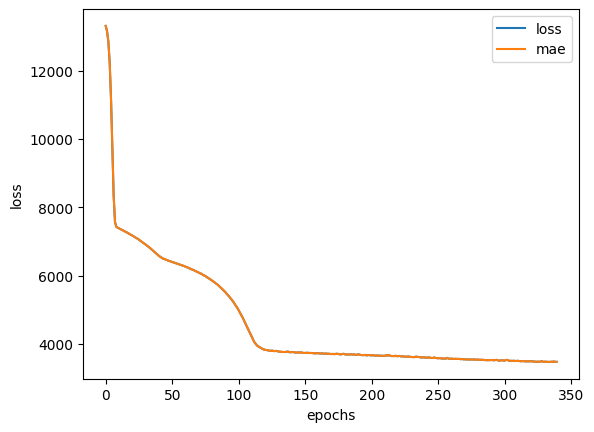

In [145]:
# Plot history (also known as a loss curve or training curve)
pd.DataFrame(history.history).plot()
plt.ylabel("loss")
plt.xlabel("epochs")

> ❓ **Question: ** How long should i train for?

It depends. Really...it depends on the problem you're working on. However, many people have asked this question before...so TensorFlow has a solution! It's called the [EarlyStopping Callback](https://www.tensorflow.org/api_docs/python/tf/keras/callbacks/EarlyStopping), which is a TensorFlow component you can add to your model to stop training once it stops improving a certain metric.

## Preprocessing data (normalization and standardization)

In terms of scaling values, neural networks tend to prefer normalization.

If you're not sure on which to use, you could try both and see which performs better.

In [152]:
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt

# Read in the insurance dataset
insurance = pd.read_csv("https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv")
insurance

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


To prepare our data we can borrow a few classes from scikit-learn

In [154]:
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.model_selection import train_test_split

# Create a column transformer
ct = make_column_transformer(
    (MinMaxScaler(), ["age", "bmi", "children"]),  # turn all values in these columns to between 0 and 1
    (OneHotEncoder(handle_unknown="ignore"), ["sex", "smoker", "region"])

)

# Create X & y
X = insurance.drop("charges", axis=1)
y= insurance["charges"]

# Build our train and test splits
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit column transformer to our training data
ct.fit(X_train)

# Transofrm training and test data with normalization (MinMaxScaler) and OneHotEncoder
X_train_normal = ct.transform(X_train)
X_test_normal = ct.transform(X_test)

In [155]:
# What does our data look like now?
X_train.loc[0]

age                19
sex            female
bmi              27.9
children            0
smoker            yes
region      southwest
Name: 0, dtype: object

In [156]:
X_train_normal[0]

array([0.60869565, 0.10734463, 0.4       , 1.        , 0.        ,
       1.        , 0.        , 0.        , 1.        , 0.        ,
       0.        ])

In [158]:
X_train.shape, X_train_normal.shape

((1070, 6), (1070, 11))

Beautiful! Our data has been normalized and one hot encoded. Now let's build a neural network model on it and seehow it goes

In [ ]:
# Build a neural network model to fit on our normalized data
# set the random seed for reproducibility
tf.random.set_seed(42)
callback = tf.keras.callbacks.EarlyStopping(monitor="loss", patience=10)

# Create the model
insurance_model_4 = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1),
])

# Compile the model
insurance_model_4.compile(
    loss=tf.keras.losses.mae,
    optimizer=tf.keras.optimizers.Adam(),
    metrics=["mae"]
)

# Fit the model
insurance_model_4.fit(X_train_normal, y_train, epochs=1000, callbacks=[callback])


In [162]:
# Evaluate our insurance model trained on normalized data
insurance_model_4.evaluate(X_test_normal, y_test)

9/9 [==============================] - 0s 4ms/step - loss: 3161.1985 - mae: 3161.1985


[3161.198486328125, 3161.198486328125]

In [163]:
insurance_model_3.evaluate(X_new_test, y_new_test)

9/9 [==============================] - 0s 6ms/step - loss: 3180.0579 - mae: 3180.0579


[3180.057861328125, 3180.057861328125]

<Axes: ylabel='Frequency'>

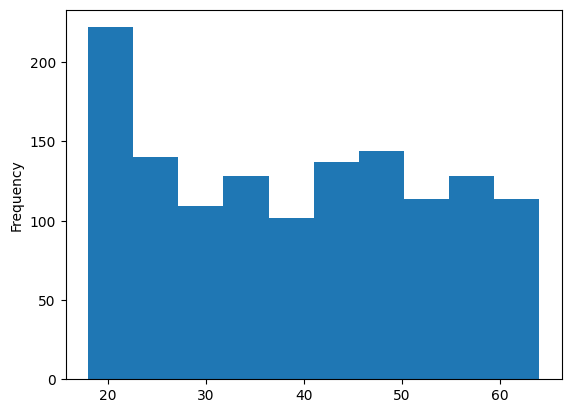

In [148]:
X_large_dataset["age"].plot(kind="hist")

<Axes: ylabel='Frequency'>

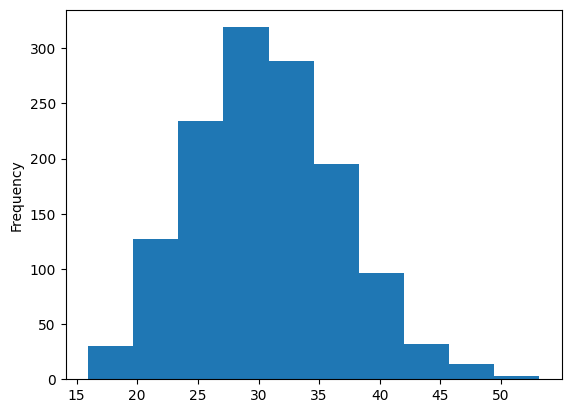

In [149]:
X_large_dataset["bmi"].plot(kind="hist")

In [150]:
X_large_dataset["children"].value_counts()

0    574
1    324
2    240
3    157
4     25
5     18
Name: children, dtype: int64